In [37]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier


In [38]:
# Generate a simple 2D dataset

X,y = make_classification(
    n_samples = 300, n_features = 2, n_informative= 2, n_redundant=0,
    n_clusters_per_class = 1, random_state = 42
)

In [39]:
# Split the data

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42)

In [40]:
# Initialize single decision tree and AdaBoost

single_tree = DecisionTreeClassifier(max_depth= 1, random_state= 42)

adaboost = AdaBoostClassifier(
    estimator= DecisionTreeClassifier(max_depth=1),
    n_estimators = 50, learning_rate = 1.0 , random_state= 42

    )

In [41]:
# Fit both models

single_tree.fit(X_train, y_train)

adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

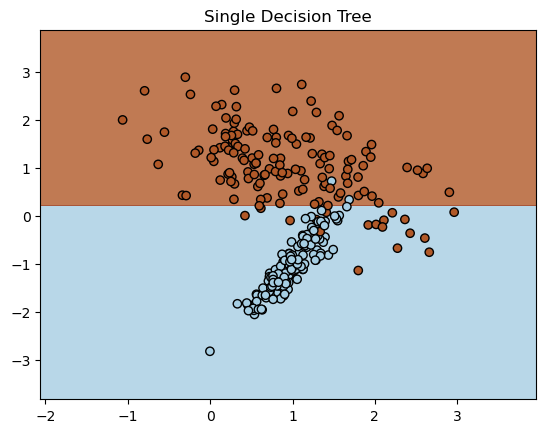

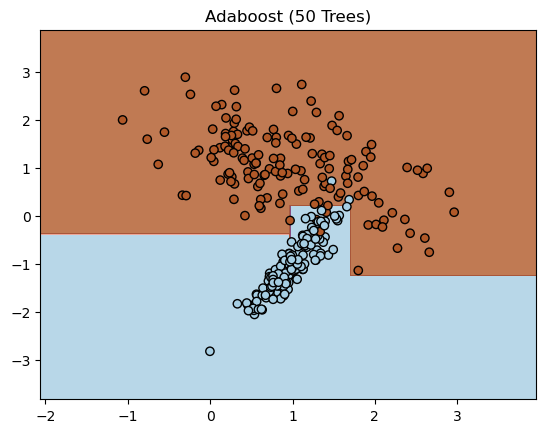

In [45]:
# Function to plot decision boundaries

def plot_decision_boundary( model, X,y, title):

    x_min, x_max = X[:,0].min() -1 , X[:,0].max() +1
    y_min, y_max = X[:,1].min() -1 , X[:,1].max() +1

    xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),
                         np.arange(y_min,y_max,0.01)
                         )
    
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()])

    Z = Z.reshape(xx.shape)


    plt.contourf(xx, yy, Z, alpha= 0.8, cmap = plt.cm.Paired)

    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k',cmap = plt.cm.Paired )

    plt.title(title)

    plt.show()


# Plot decision boundaries

plot_decision_boundary(single_tree, X,y, title = "Single Decision Tree")
plot_decision_boundary(adaboost, X,y, title = "Adaboost (50 Trees)")
